In [62]:
import pandas as pd
from pandas.plotting import scatter_matrix

d={'Fautes':[6,5,12,6,11,10,14,6,10,8,8,4],'Longueur':[405,385,875,379,696,493,408,270,496,584,453,428]}

df=pd.DataFrame(data=d)




In [63]:
print(df)

    Fautes  Longueur
0        6       405
1        5       385
2       12       875
3        6       379
4       11       696
5       10       493
6       14       408
7        6       270
8       10       496
9        8       584
10       8       453
11       4       428


In [64]:
df.corr()

,Fautes,Longueur
Fautes,1.00000,0.55892
Longueur,0.55892,1.00000


In [65]:
df.head()

,Fautes,Longueur
0,6,405
1,5,385
2,12,875
3,6,379
4,11,696


In [66]:
df.describe()

,Fautes,Longueur
count,12.000000,12.000000
mean,8.333333,489.333333
std,3.084664,162.493263
min,4.000000,270.000000
25%,6.000000,400.000000
50%,8.000000,440.500000
75%,10.250000,518.000000
max,14.000000,875.000000


array([[<AxesSubplot:xlabel='Fautes', ylabel='Fautes'>,
        <AxesSubplot:xlabel='Longueur', ylabel='Fautes'>],
       [<AxesSubplot:xlabel='Fautes', ylabel='Longueur'>,
        <AxesSubplot:xlabel='Longueur', ylabel='Longueur'>]], dtype=object)

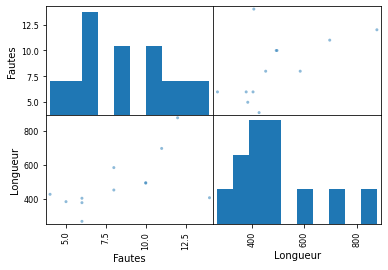

In [67]:
scatter_matrix(df)

In [68]:
# Importer le modèle kmeans clustering.
from sklearn.cluster import KMeans
# Initialiser le modèle avec 2 paramètres -- nombre de clusters et random state.
kmeans_model = KMeans(n_clusters=5, random_state=1)
# Seulement les colonnes numériques de games.
good_columns = df
# Adapter le modèle en utilisant les bonnes colonnes.
kmeans_model.fit(good_columns)
# Obtenir les labels des clusters.
labels = kmeans_model.labels_

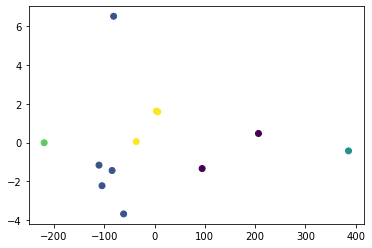

In [69]:
# Importer le modèle PCA.
from sklearn.decomposition import PCA
# Créer un modèle PCA.
pca_2 = PCA(2)
# adapter le modèle PCA aux colonnes numériques précédentes.
plot_columns = pca_2.fit_transform(good_columns)
# Faire un graphique à nuage de points pour chaque données, à partir des clusters.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Afficher le graphique.
plt.show()

In [84]:
# Obtenir toutes les colonnes du DataFrame.
columns = df.columns.tolist()
# Filtrer les colonnes pour supprimer celles que nous ne voulons pas.
columns = [c for c in columns if c in ["Fautes", "Longueur"]]
# Stocker la variable que nous voulons prédire.
target = "Fautes"

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# Générer le set de training. Fixer random_state pour répliquer lé resultats ultérieurement.
train = df.sample(frac=0.8, random_state=1)

# Sélectionner tout ce qui n'est pas dans le set de training et le mettre dans le set de test.
test = df.loc[~df.index.isin(train.index)]

# Afficher les dimensions des 2 sets.
print(train.shape)
print(test.shape)

(10, 2)
(2, 2)


In [87]:
# Importer le modèle LinearRegression.
from sklearn.linear_model import LinearRegression
# Initialiser la classe du modèle.
model = LinearRegression()
# Adapter le modèle aux données d'entrainement the model to the training data.
model.fit(train[columns], train[target])

LinearRegression()

In [89]:
# Importer la fonction de calcul d'erreur depuis scikit-learn.
from sklearn.metrics import mean_squared_error
# Générer des prédictions pour le set de test.
predictions = model.predict(test[columns])
# Calculer l'erreur entre nos prédictions et les valeurs réelles que nous connaissons.
mean_squared_error(predictions, test[target])

0.0

In [92]:
# Importer le modèle random forest.
from sklearn.ensemble import RandomForestRegressor
# Initialiser le modèle avec certains paramètres.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Adapter le modèle aux données.
model.fit(train[columns], train[target])
# Faire des prédictions.
predictions = model.predict(test[columns])
# Calculer l'erreur.
mean_squared_error(predictions, test[target])



3.759720999999993

In [93]:
print(df.sort_values(by=['Longueur']))

    Fautes  Longueur
7        6       270
3        6       379
1        5       385
0        6       405
6       14       408
11       4       428
10       8       453
5       10       493
8       10       496
9        8       584
4       11       696
2       12       875


In [95]:
df=df.sort_values(by=['Longueur'])
print(df)

    Fautes  Longueur
7        6       270
3        6       379
1        5       385
0        6       405
6       14       408
11       4       428
10       8       453
5       10       493
8       10       496
9        8       584
4       11       696
2       12       875


<AxesSubplot:xlabel='Longueur'>

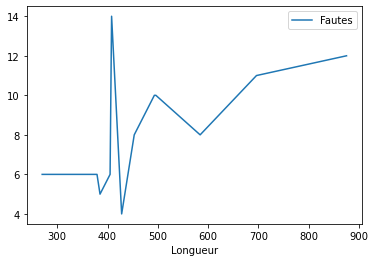

In [99]:
import matplotlib.pyplot as plt

df.plot(x="Longueur", y="Fautes")